 Part 1: EDA

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

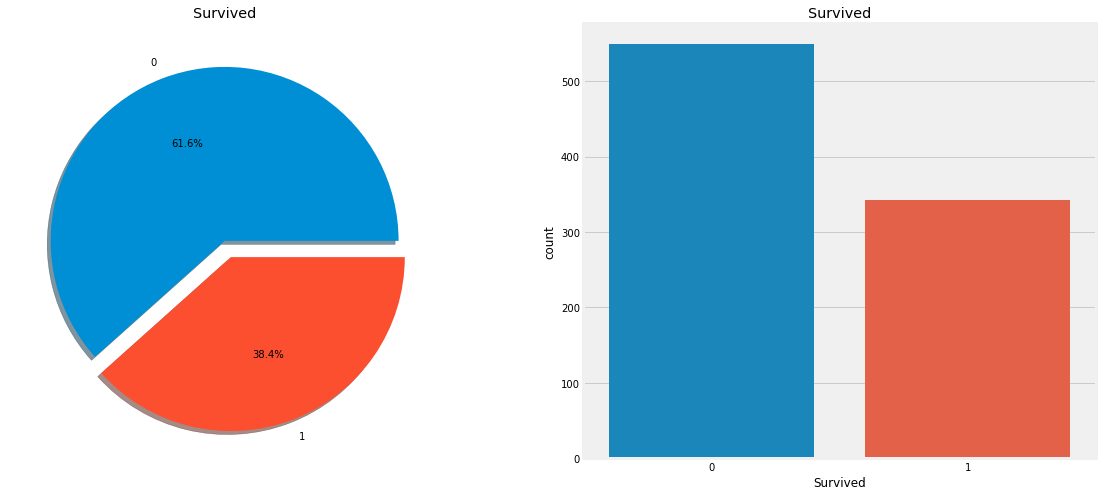

In [6]:
f, ax = plt.subplots(1,2, figsize = (18,8))

data["Survived"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')


sns.countplot("Survived", data = data, ax = ax[1])
ax[1].set_title("Survived")

plt.show()


사고에서 살아남은 승객은 많지 않은 것이 분명합니다.

훈련 세트에있는 891 명의 승객 중 약 350 명이 살아 남았습니다. 

즉 전체 훈련 세트의 38.4 %만이 충돌에서 살아 남았습니다. 


데이터에서 더 나은 통찰력을 얻고 어떤 범주의 승객이 살아남 았는지, 누가 그렇지 않았는지 확인하려면 더 많이 파헤쳐 야합니다.

데이터 세트의 다양한 기능을 사용하여 생존율을 확인하려고합니다. 일부 기능은 성별, 출국 항, 나이 등입니다.

먼저 다양한 유형의 기능을 이해해보겠습니다.

# Type of Features

- 카테고리컬 변수:
범주 형 변수는 범주가 두 개 이상이고 해당 기능의 각 값을 범주별로 분류 할 수있는 변수입니다. 

예를 들어 성별은 두 범주 (남성 및 여성)를 갖는 범주 형 변수입니다. 
우리는 그러한 변수를 정렬하거나 순서를 지정할 수 없습니다. 

명목 변수라고도합니다.

예시: Sex, Embarked.

- Ordinal 변수: 
순서 형 변수는 범주 형 값과 비슷하지만 값 사이에 상대적인 순서 나 정렬이 가능하다는 차이점이 있습니다. 
예를 들어 : Tall, Medium, Short 값이있는 Height와 같은 기능이있는 경우 Height는 순서형 변수입니다. 
여기서 우리는 변수에 상대적인 정렬을 할 수 있습니다.

예시: PClass

- 연속형 변수: 
두 지점 사이 또는 특성 열의 최소값 또는 최대 값 사이의 값을 가질 수있는 특성은 연속적이라고합니다.

예시 : 연령

# 성별 변수 (범주형 변수)

In [8]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

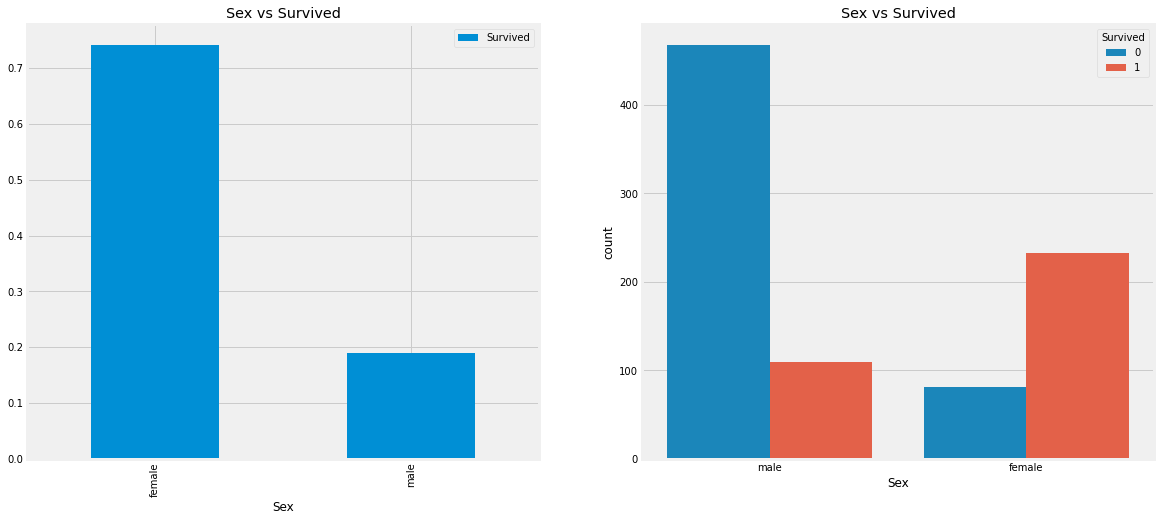

In [13]:
f, ax = plt.subplots(1,2, figsize = (18, 8))

data[["Sex","Survived"]].groupby("Sex").mean().plot.bar(ax = ax[0])
ax[0].set_title("Sex vs Survived")


sns.countplot("Sex", hue = "Survived", data = data, ax = ax[1])
ax[1].set_title("Sex vs Survived")

plt.show()

- 흥미로워 보입니다. 배에 탄 남성의 수는 여성의 수보다 훨씬 많습니다. 

그럼에도 불구하고 구원받은 여성의 수는 구원받은 남성의 거의 두 배입니다. 

배에 탄 여성의 생존율은 약 75 %이고 남성은 약 18-19 %입니다.

이것은 모델링에있어 매우 중요한 기능으로 보입니다. 하지만 최고인가 ?? 다른 기능을 확인해 보겠습니다.

# Pclass (순서형 변수)

In [14]:
pd.crosstab(data["Pclass"], data["Survived"], margins = True).style.background_gradient("summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


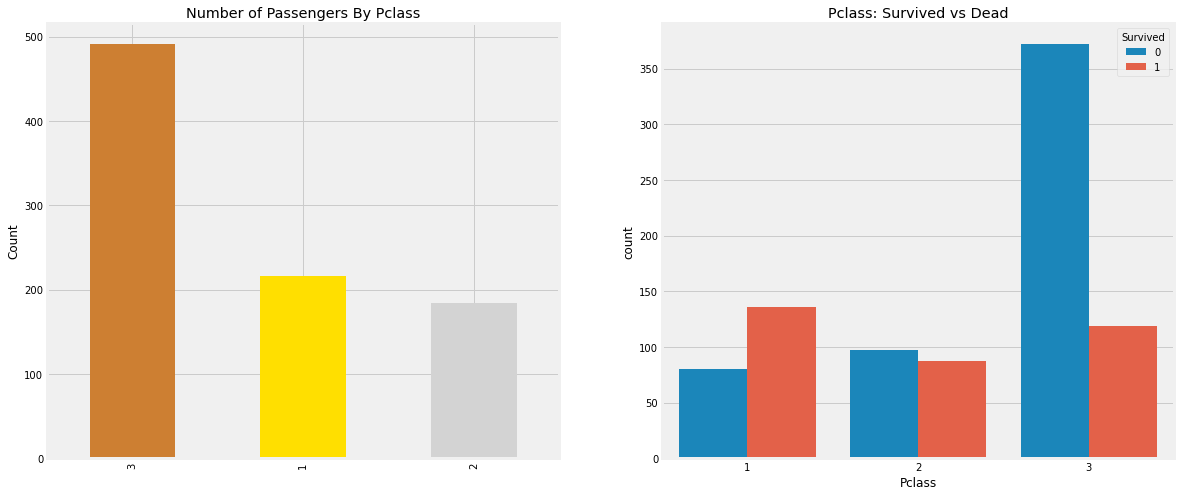

In [15]:
f, ax = plt.subplots(1,2, figsize = (18,8))

data["Pclass"].value_counts().plot.bar(color = ["#CD7F32", "#FFDF00", "#D3D3D3"], ax = ax[0])
ax[0].set_title("Number of Passengers By Pclass")
ax[0].set_ylabel("Count")

sns.countplot("Pclass", hue = "Survived", data = data, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")

plt.show()

- 사람들은 돈으로 모든 것을 살 수 없다고 말합니다. 

그러나 우리는 Pclass 1의 Passenegers가 구조하는 동안 매우 높은 우선 순위를 부여 받았다는 것을 분명히 알 수 있습니다. 

Pclass 3의 승객 수가 훨씬 많았지 만 여전히 생존율은 약 25 %로 매우 낮습니다.

Pclass 1의 경우 생존율은 약 63 %이고 Pclass2의 경우 약 48 %입니다. 


따라서 돈과 지위가 중요합니다. 그런 물질 주의적 세계.

조금 더 들어가서 다른 흥미로운 관찰을 확인합시다. Sex와 Pclass Together로 생존율을 확인하세요.

In [18]:
pd.crosstab([data["Sex"], data["Survived"]], data["Pclass"], margins = True).style.background_gradient("summer_r")

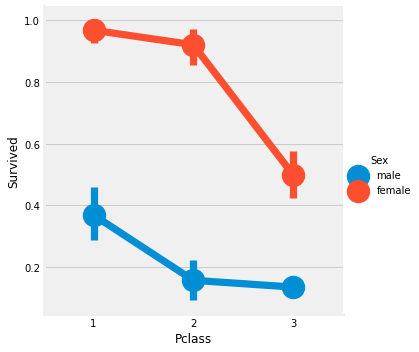

In [19]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = data)

plt.show()

- 이 경우 FactorPlot을 사용하면 범주 형 값을 쉽게 분리 할 수 있기 때문입니다.

CrossTab과 FactorPlot을 보면 Pclass1의 여성 94 명 중 3 명만이 사망했기 때문에 Pclass1 여성의 생존율이 약 95-96 %임을 쉽게 추론 할 수 있습니다.

Pclass에 관계없이 구조하는 동안 여성이 최우선 순위를 가졌음이 분명합니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른 기능을 분석해 보겠습니다.

## Age (연속형 변수)

In [20]:
print("가장 나이 많은 사람:", data["Age"].max())
print("가장 나이 적은 사람:", data["Age"].min())
print("평균 나이:", data["Age"].mean())

가장 나이 많은 사람: 80.0
가장 나이 적은 사람: 0.42
평균 나이: 29.69911764705882


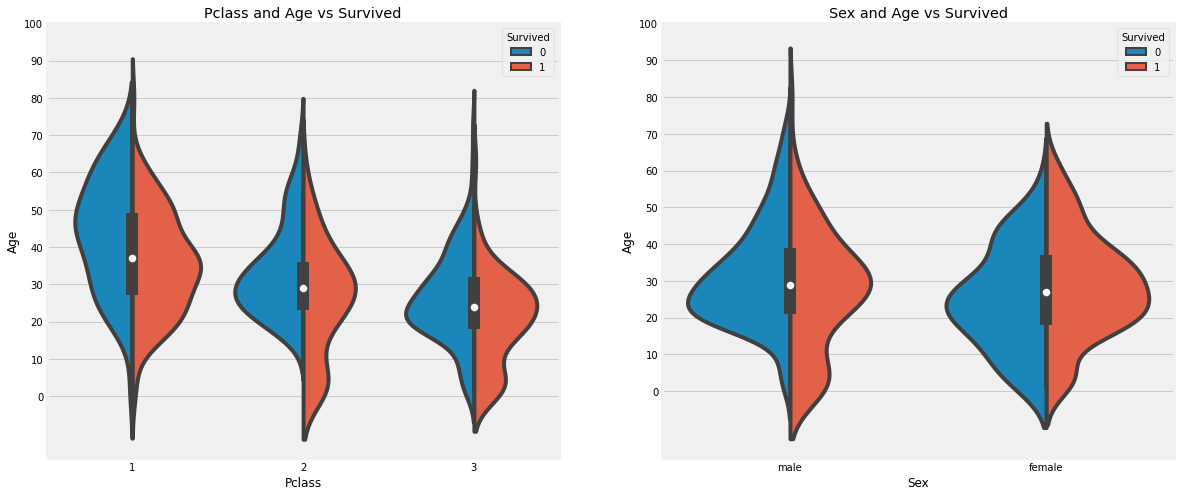

In [21]:
f, ax = plt.subplots(1,2, figsize = (18,8))

sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))


sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## Observations: 
1) Pclass에 따라 어린이의 수가 증가하고 10 세 미만의 행인 (즉, 어린이)의 생존율은 Pclass와 관계없이 양호 해 보입니다.

2) Pclass1의 20-50 세 Passenegers의 생존 가능성은 높고 여성에게 더 좋습니다.

3) 남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.

앞서 살펴본 것처럼 Age 기능에는 177 개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당 할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많다는 것입니다. 우리는 평균 나이가 29 세인 4 살짜리 아이를 배정 할 수 없습니다. 승객이 거짓말을하는 연령대를 알 수있는 방법이 있습니까 ??

빙고 !!!!, 이름 기능을 확인할 수 있습니다. 기능을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균 값을 각 그룹에 할당 할 수 있습니다.

''What 's In A Name ?? ''---> Feature

In [23]:
 data["Initial"] = 0
    
    
data["Initial"] = data.Name.str.extract("([A-Za-z]+)\.")

In [26]:
pd.crosstab(data["Initial"], data["Survived"], margins = True).T.style.background_gradient("summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Survived,,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0,549
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,342
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [31]:
data["Initial"].replace(["Mlle", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer", "Col", "Rev", "Capt", "Sir", "Don"], 
                       ["Miss", "Miss", "Miss", "Mr", "Mr", "Mrs", "Mrs","Other", "Other","Other" ,"Mr", "Mr", "Mr"], inplace = True)

In [32]:
data.groupby("Initial").Age.mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [33]:
data.loc[(data.Age.isnull()) & (data.Initial == "Mr"), "Age"] = 33

data.loc[(data.Age.isnull()) & (data.Initial == "Mrs"), "Age"] = 36

data.loc[(data.Age.isnull()) & (data.Initial == "Master"), "Age"] = 5

data.loc[(data.Age.isnull()) & (data.Initial == "Miss"), "Age"] = 22

data.loc[(data.Age.isnull()) & (data.Initial == "Other"), "Age"] = 46

In [34]:
data.Age.isnull().any()

False

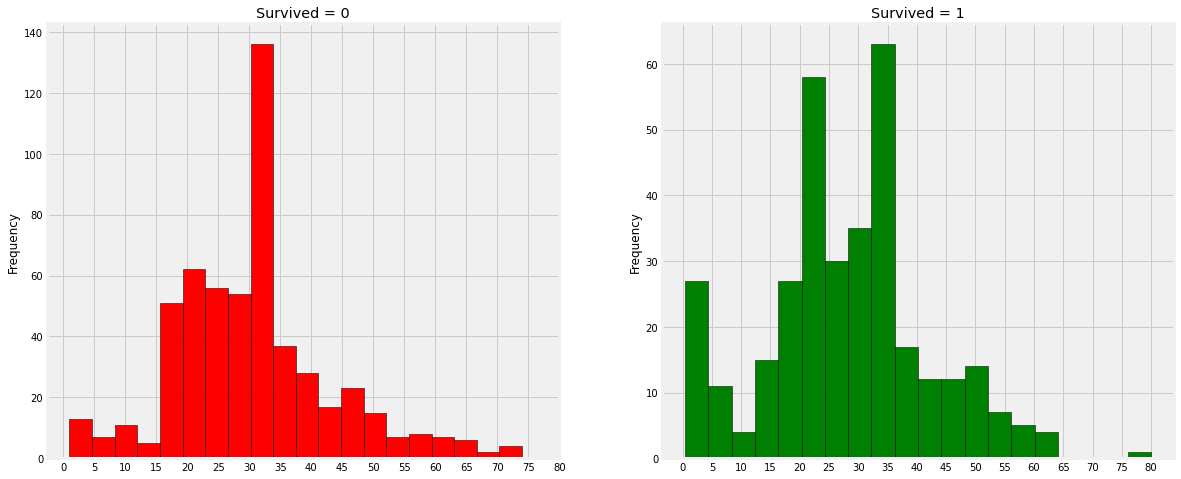

In [37]:
f, ax = plt.subplots(1,2, figsize= (18,8))

data[data["Survived"] ==0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor = "black", color = "red")
ax[0].set_title("Survived = 0")
x1=list(range(0, 85, 5 ))
ax[0].set_xticks(x1)



data[data["Survived"] == 1].Age.plot.hist(ax = ax[1], color = "green", bins = 20, edgecolor = "black")
ax[1].set_title("Survived = 1")
ax[1].set_xticks(x1)

plt.show()

Observations


1) 유아 (5 세 미만)가 많이 구제되었습니다 (여성과 아동 우선 정책).

2) 가장 나이 많은 승객이 구해졌습니다 (80 년).

3) 최대 사망자 수는 30-40 세였다.

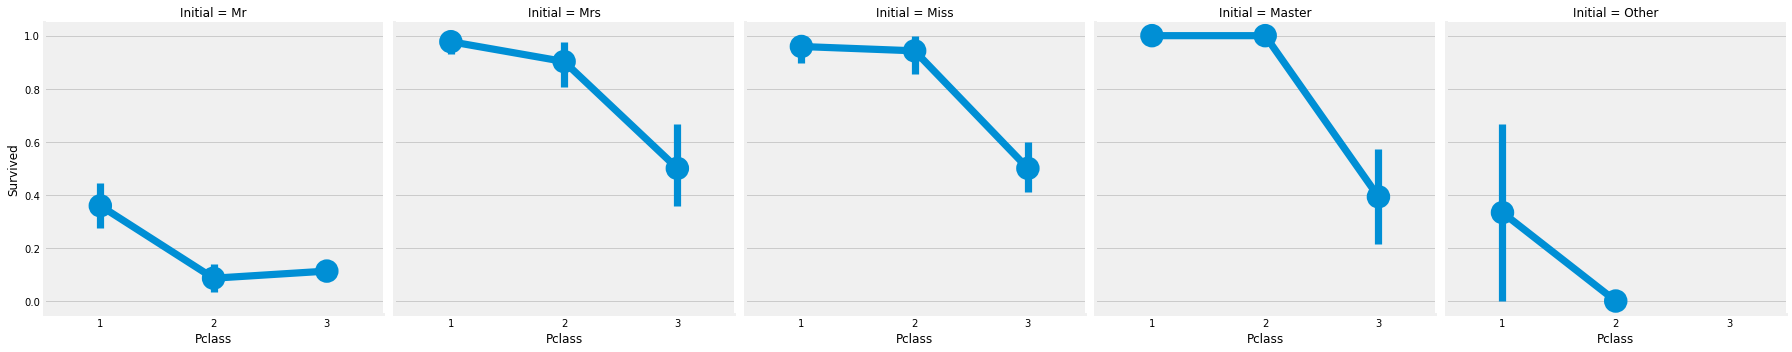

In [38]:
sns.factorplot("Pclass", "Survived", col = "Initial", data = data)

plt.show()

# Embarked (범주형변수)

In [39]:
pd.crosstab([data["Embarked"], data["Pclass"]], [data["Sex"], data["Survived"]], margins = True).style.background_gradient("summer_r")

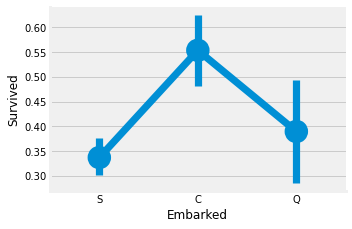

In [42]:
sns.factorplot("Embarked", "Survived", data = data)

fig = plt.gcf()
fig.set_size_inches(5,3)

plt.show()

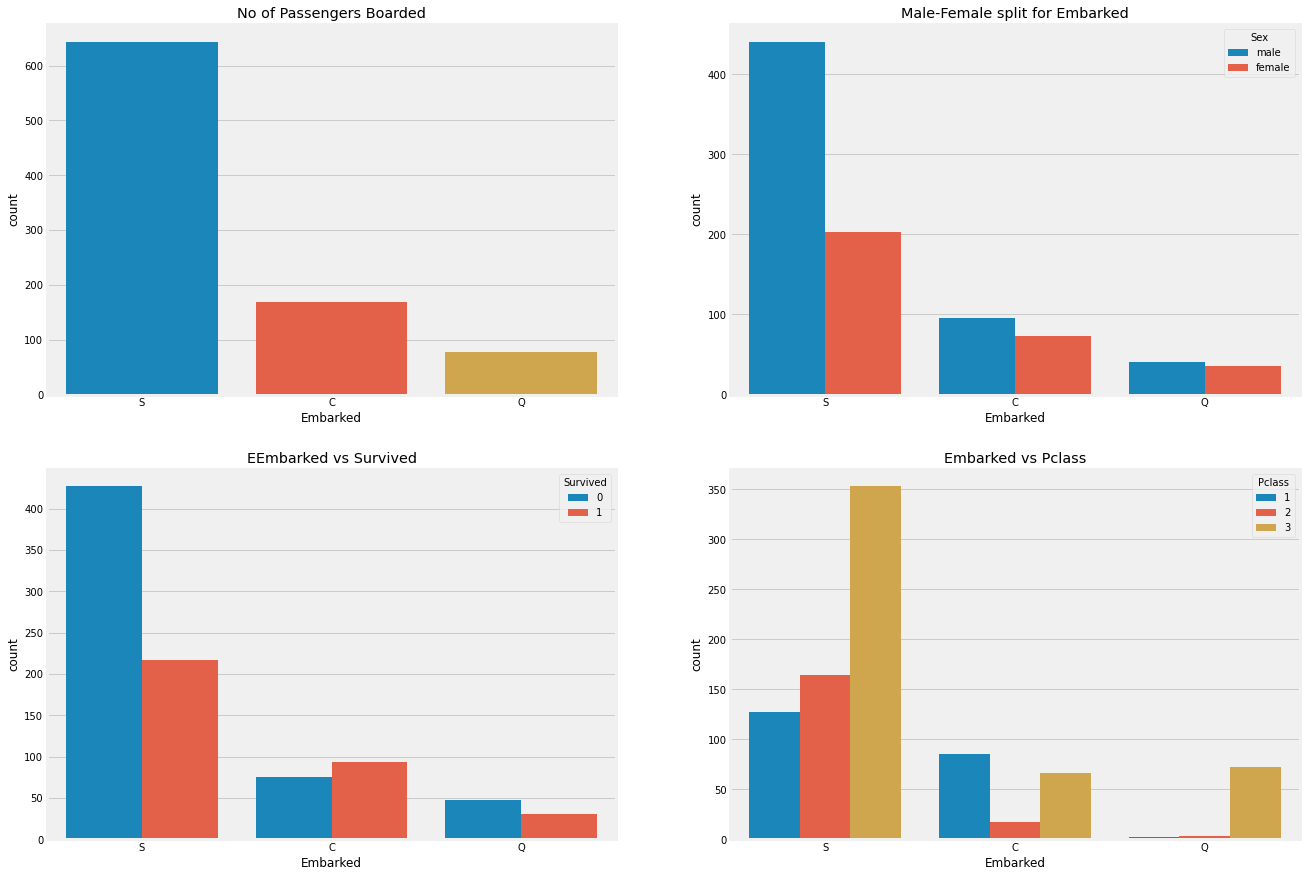

In [50]:
f, ax = plt.subplots(2,2, figsize = (20,15))

sns.countplot("Embarked", data = data, ax = ax[0,0])
ax[0,0].set_title("No of Passengers Boarded")


sns.countplot("Embarked", hue = "Sex", data = data, ax = ax[0,1])
ax[0,1].set_title("Male-Female split for Embarked")


sns.countplot("Embarked", hue = "Survived", data = data, ax = ax[1,0])
ax[1,0].set_title("EEmbarked vs Survived")

sns.countplot("Embarked", hue = "Pclass", data = data, ax = ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace = 0.2, hspace = 0.5) #윗줄 차트와의 간격 조정


plt.show()

# Observations
1) S에서 탑승 한 최대 통행인. 대부분은 Pclass3에서 탑승합니다.

2) C에서 온 승객들은 그들 중 좋은 비율이 살아남 았기 때문에 운이 좋은 것 같습니다. 그 이유는 모든 Pclass1 및 Pclass2 승객의 구조 때문일 수 있습니다.

3) Embark S는 대부분의 부자들이 탑승 한 항구를 바라 봅니다. 여전히 생존 가능성은 낮습니다. Pclass3의 많은 승객이 81 % 정도 생존하지 못했기 때문입니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3 출신이었습니다.

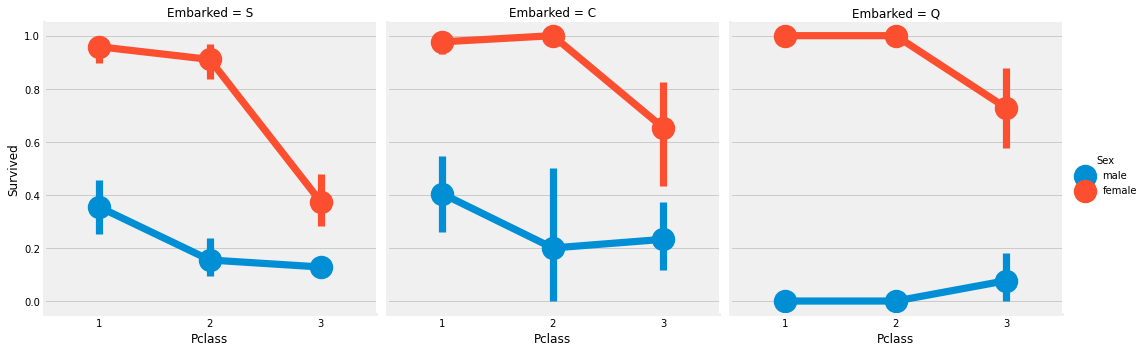

In [51]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data= data, col = "Embarked")
plt.show()

1) Pclass에 관계없이 Pclass1과 Pclass2의 여성의 생존 확률은 거의 1입니다.

2) 남성과 여성 모두 생존율이 매우 낮기 때문에 포트 S는 Pclass3 Passenegers에게 매우 불행한 것으로 보입니다. (돈 문제)

3) 거의 모든 것이 Pclass 3에서 왔기 때문에 포트 Q는 남성에게 가장 불투명 해 보입니다.

In [53]:
data["Embarked"].fillna("S", inplace = True)

In [54]:
data.Embarked.isnull().any()

False

# SibSip (이산형 변수)

In [57]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = "summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


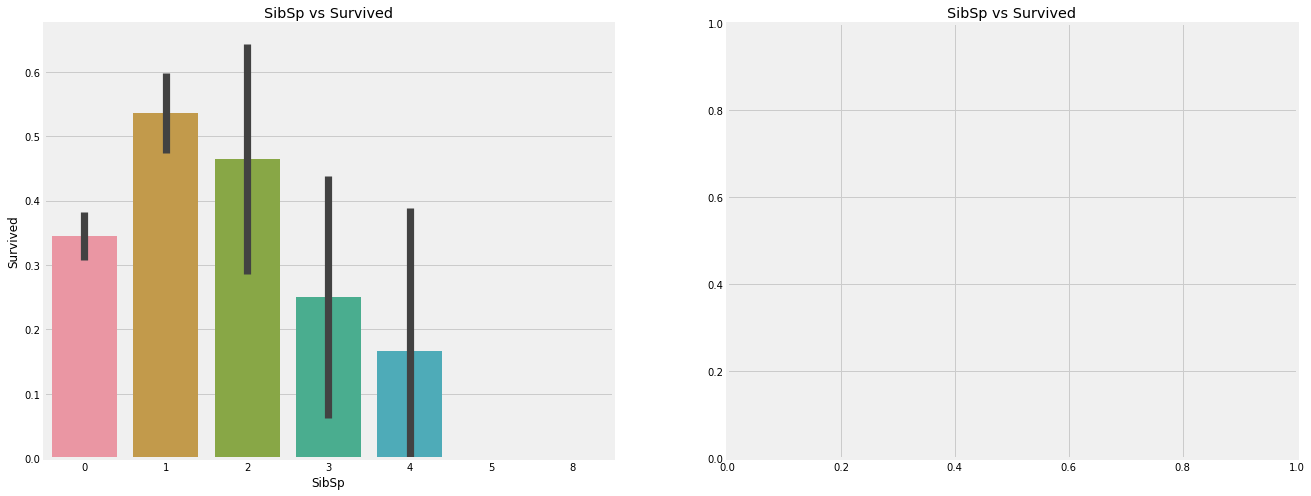

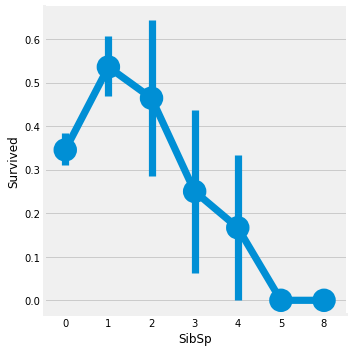

In [60]:
f, ax = plt.subplots(1,2, figsize = (20,8))

sns.barplot("SibSp", "Survived", data = data, ax = ax[0])
ax[0].set_title("SibSp vs Survived")

sns.factorplot("SibSp", "Survived", data = data, ax = ax[1])
ax[1].set_title("SibSp vs Survived")

plt.show()
plt.close(2)


막대 그래프와 요인 그림은 승객이 형제없이 혼자 탑승 할 경우 생존율이 34.5 %임을 보여줍니다. 

형제 자매 수가 증가하면 그래프는 대략 감소합니다. 이것은 의미가 있습니다. 즉, 가족이 있다면 먼저 저를 살리는 대신 그들을 살리려고 노력할 것입니다. 

놀랍게도 5-8 인 가족의 생존율은 0 %입니다. 그 이유는 Pclass ??

그 이유는 Pclass입니다. 교차 분석은 SibSp> 3을 가진 Person이 모두 Pclass3에 있음을 보여줍니다. Pclass3 (> 3)의 모든 대가족이 사망 한 것이 임박했습니다.

## Parch

In [62]:
pd.crosstab(data.Parch, data.Pclass, margins = True).style.background_gradient(cmap = "summer_r")

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


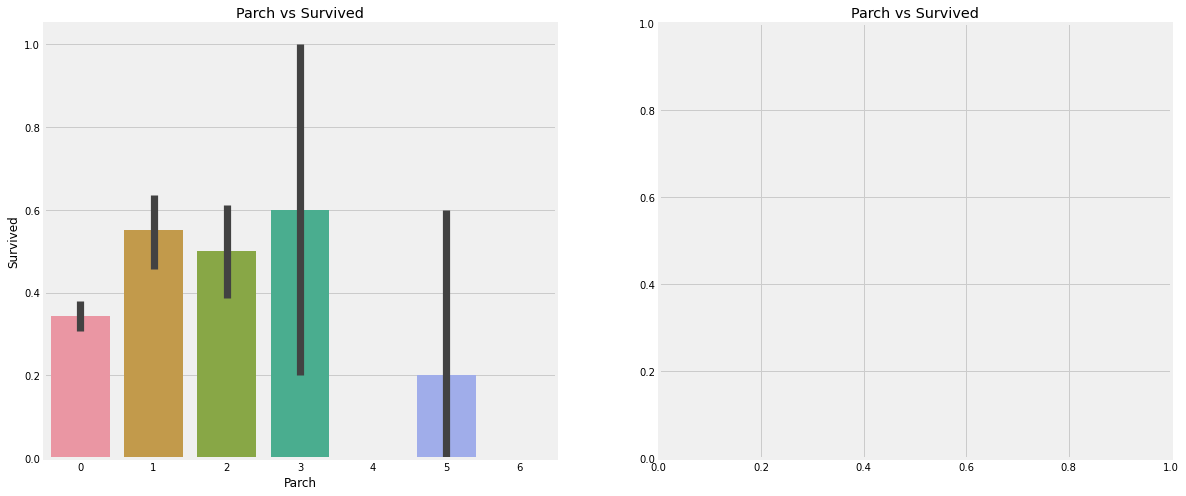

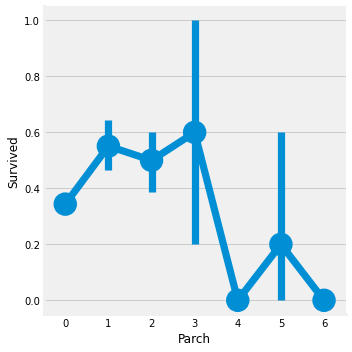

In [63]:
f, ax = plt.subplots(1,2, figsize = (18, 8))

sns.barplot("Parch", "Survived", data= data, ax = ax[0])
ax[0].set_title("Parch vs Survived")

sns.factorplot("Parch", "Survived", data = data, ax = ax[1])
ax[1].set_title("Parch vs Survived")

plt.show()

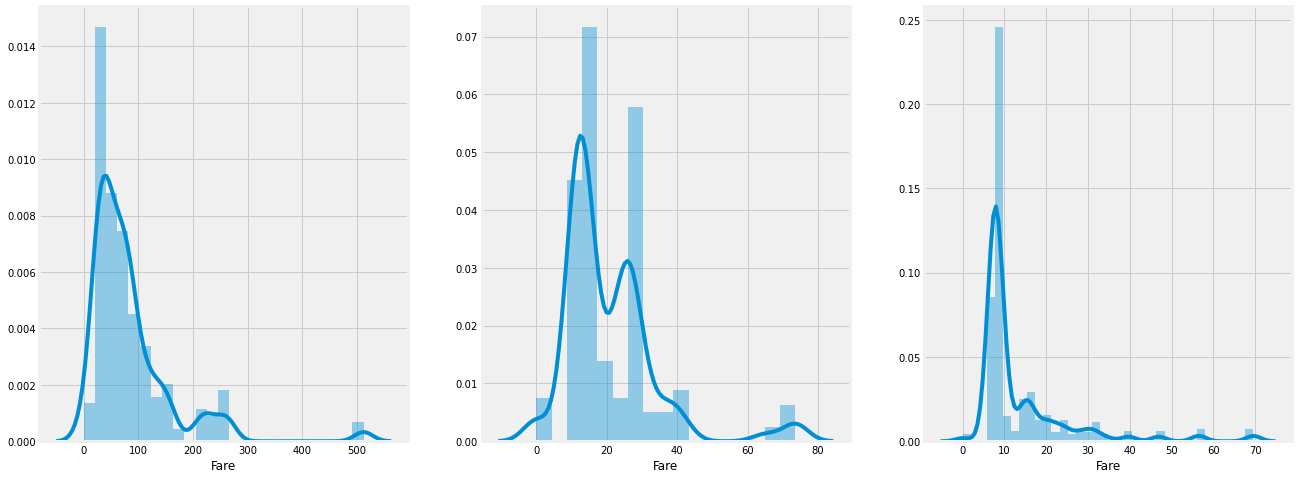

In [64]:
f, ax = plt.subplots(1,3, figsize = (20,8))

sns.distplot(data[data["Pclass"]==1].Fare, ax = ax[0])

sns.distplot(data[data["Pclass"] == 2].Fare, ax = ax[1])

sns.distplot(data[data["Pclass"] == 3].Fare, ax = ax[2])

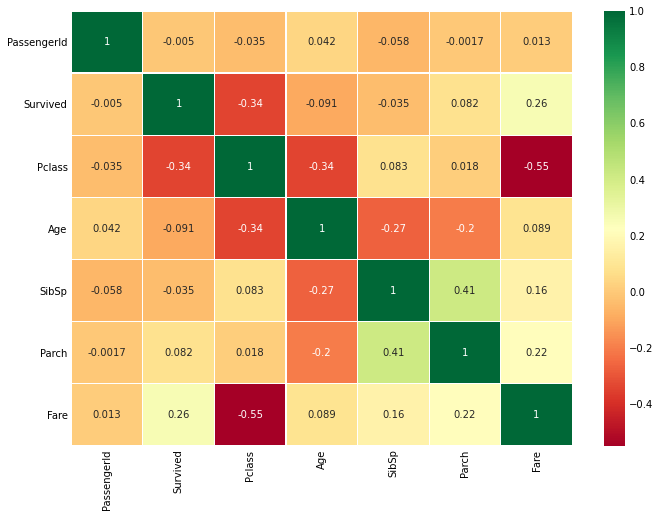

In [67]:
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn", linewidths = 0.2)

fig = plt.gcf()


fig.set_size_inches(10,8)

plt.show()

In [69]:
data["Age_band"] = 0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [70]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band


,Age_band
1,382
2,325
0,104
3,69
4,11


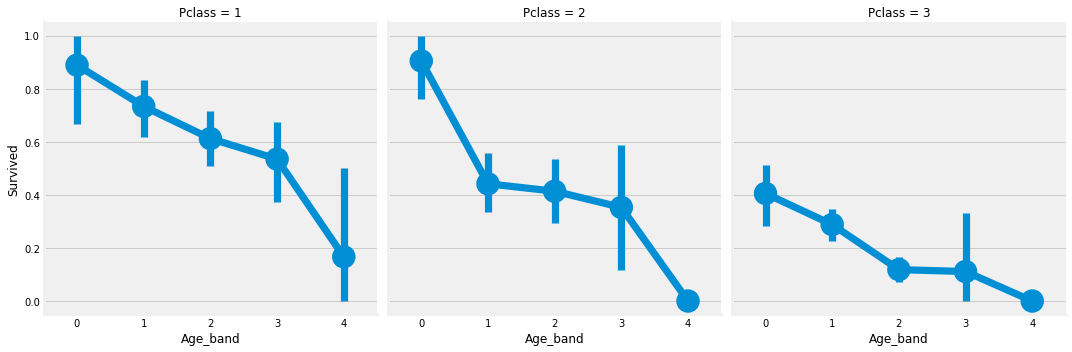

In [71]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

 True that..the survival rate decreases as the age increases irrespective of the Pclass.


사실 .. P 클래스에 관계없이 나이가 들어감에 따라 생존율이 감소합니다.

Family_Size 및 혼자
이 시점에서 "Family_size"및 "Alone"이라는 새 기능을 만들고 분석 할 수 있습니다. 

이 기능은 Parch와 SibSp의 요약입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합 된 데이터를 제공합니다. 

혼자는 승객이 혼자인지 아닌지를 나타냅니다.

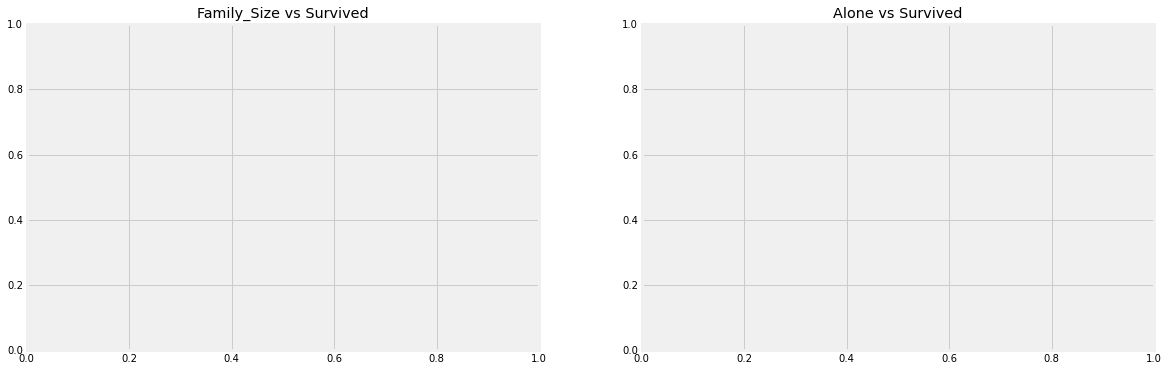

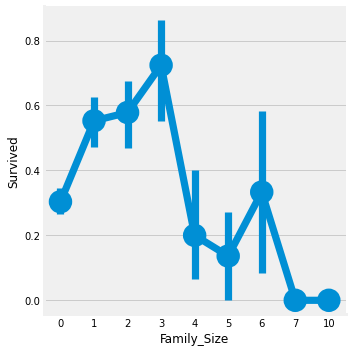

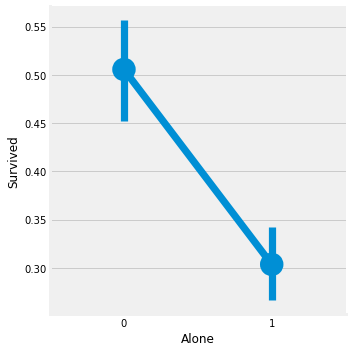

In [74]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

Family_Size = 0은 통행인이 혼자임을 의미합니다. 분명히 혼자이거나 family_size = 0이면 생존 가능성이 매우 낮습니다.
가족 수> 4 인 경우 기회도 감소합니다. 이것은 또한 모델의 중요한 기능으로 보입니다. 더 자세히 살펴 보겠습니다.

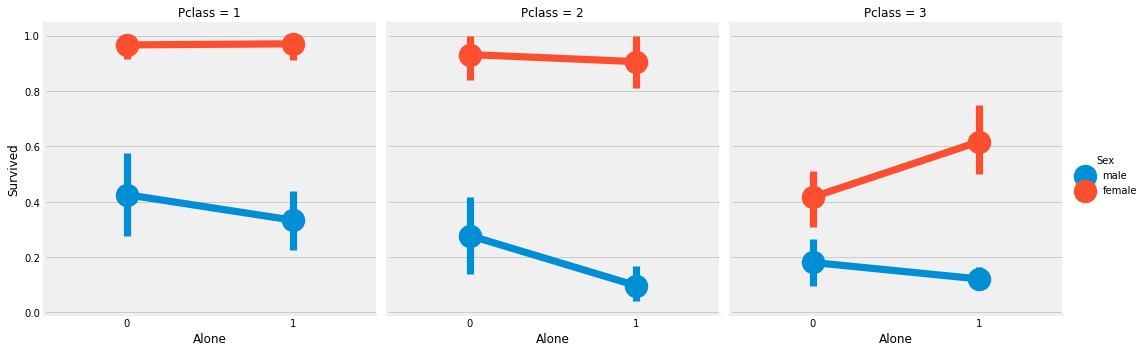

In [75]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()


가족이있는 여성보다 혼자있는 여성의 확률이 높은 Pclass3를 제외하고는, 혼자있는 것은 성별이나 Pclass에 관계없이 해롭다는 것을 알 수 있습니다.

## Fare_Range
운임은 또한 연속적인 특성이므로 서수 값으로 변환해야합니다. 이를 위해 pandas.qcut을 사용합니다.

그래서 qcut이하는 일은 우리가 통과 한 빈의 수에 따라 값을 분할하거나 배열하는 것입니다. 따라서 5 개의 빈을 전달하면 5 개의 별도 빈 또는 값 범위에 균등 한 간격으로 값이 정렬됩니다.

In [78]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 우리는 fare_range가 증가할수록 생존 가능성이 증가한다는 것을 분명히 알 수 있습니다.

이제 Fare_Range 값을 그대로 전달할 수 없습니다. Age_Band에서했던 것과 같은 싱글 톤 값으로 변환해야합니다.

In [79]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

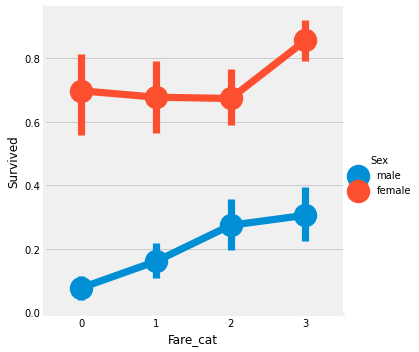

In [80]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()


분명히 Fare_cat이 증가함에 따라 생존 기회가 증가합니다. 이 기능은 성별과 함께 모델링하는 동안 중요한 기능이 될 수 있습니다.

# 문자열 값을 숫자로 변환
기계 학습 모델에 문자열을 전달할 수 없기 때문에 성, Embarked 등의 특성을 숫자 값으로 변환해야합니다.

In [81]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

# 불필요한 피쳐 삭제
이름-> 카테고리 값으로 변환 할 수 없으므로 이름 기능이 필요하지 않습니다.

Age-> Age_band 기능이 있으므로 필요하지 않습니다.

티켓-> 분류 할 수없는 임의의 문자열입니다.

요금-> Fare_cat 기능이 있으므로 필요하지 않습니다.

캐빈-> 많은 NaN 값과 많은 승객이 여러 개의 캐빈을 가지고 있습니다. 그래서 이것은 쓸모없는 기능입니다.

Fare_Range-> fare_cat 기능이 있습니다.

PassengerId-> 분류 할 수 없습니다.

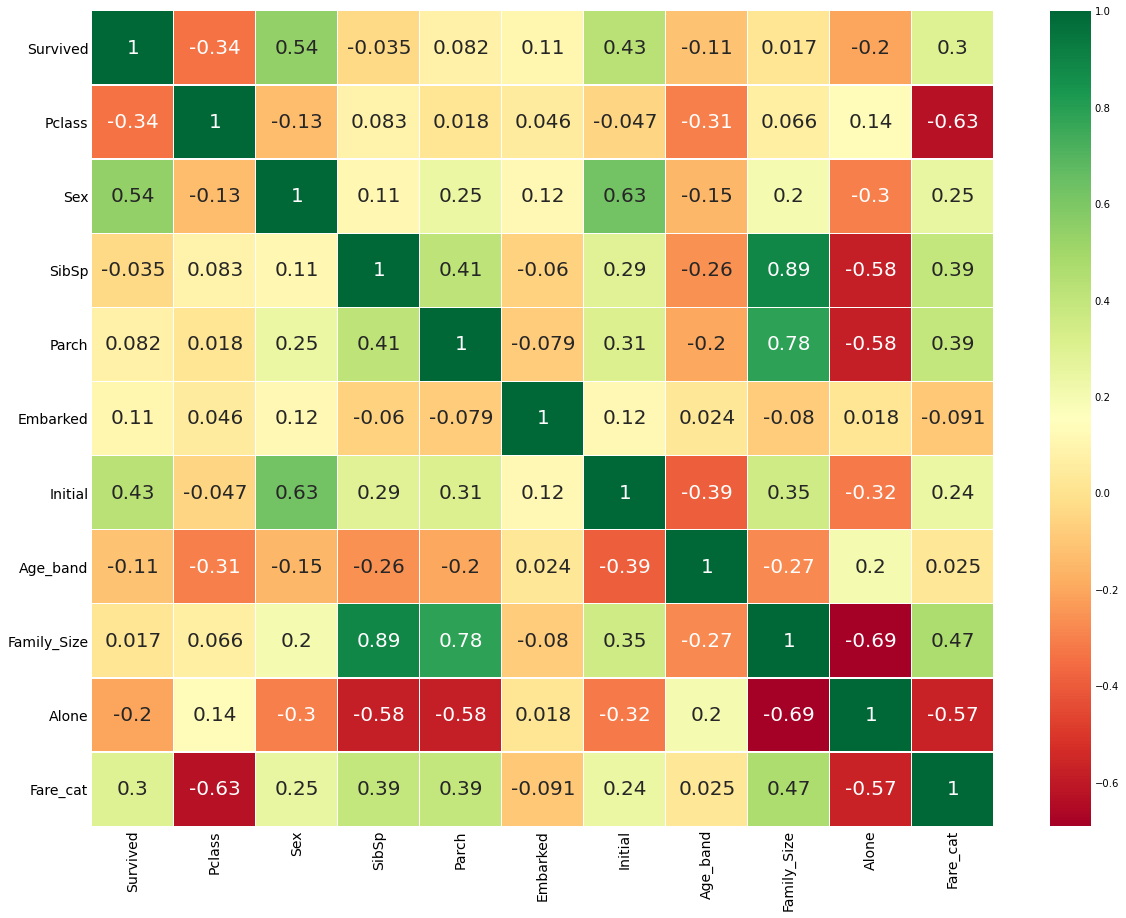

In [82]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- 이제 위의 상관 관계 플롯에서 긍정적으로 관련된 몇 가지 기능을 볼 수 있습니다. 그들 중 일부는 SibSp 및 d Family_Size 및 Parch 및 Family_Size이며 Alone 및 Family_Size와 같은 일부 부정적인 것입니다.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression #LR

from sklearn import svm #support vector machine

from sklearn.ensemble import RandomForestClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import confusion_matrix

In [92]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data["Survived"])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data["Survived"]

## Radial Support Vector Machine (SVM)

In [94]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)

print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


# Linear Support Vector Machine (linear - SVM)

In [99]:
model = svm.SVC(kernel = "linear", C = 0.1, gamma =0.1)
model.fit(train_X, train_Y)

prediction2 = model.predict(test_X)

print("Accuracy for linear SVM is", metrics.accuracy_score(prediction1,test_Y))

Accuracy for linear SVM is 0.835820895522388


# Logistic Regression



In [100]:
model = LogisticRegression()

model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)

print("accuracy of LR is", metrics.accuracy_score(prediction3, test_Y))

accuracy of LR is 0.8134328358208955


# Decision Tree

In [101]:
model = DecisionTreeClassifier()

model.fit(train_X, train_Y)

prediction4 = model.predict(test_X)

print("accuracy of Decision is", metrics.accuracy_score(prediction4, test_Y))

accuracy of Decision is 0.8022388059701493


# KNN

In [102]:
model = KNeighborsClassifier()

model.fit(train_X, train_Y)

prediction5 = model.predict(test_X)

print("accuracy of KNN is", metrics.accuracy_score(prediction5, test_Y))

accuracy of KNN is 0.832089552238806


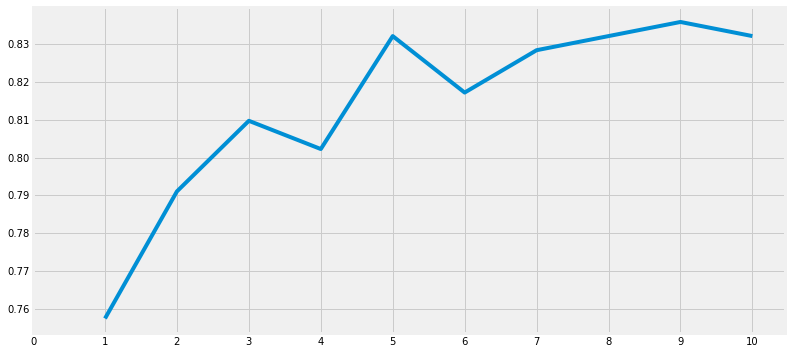

In [103]:
a_index =  list(range(1,11))


a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()



In [104]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(train_X, train_Y)

prediction5 = model.predict(test_X)

print("accuracy of KNN is", metrics.accuracy_score(prediction5, test_Y))

accuracy of KNN is 0.832089552238806


# Gaussian Naive Bayes

In [105]:
model =GaussianNB()

model.fit(train_X, train_Y)

prediction6 = model.predict(test_X)

print(metrics.accuracy_score(prediction5, test_Y))

0.832089552238806


# Random Forests

In [107]:
model = RandomForestClassifier(n_estimators = 100)

model.fit(train_X, train_Y)

prediction7 = model.predict(test_X)

print(metrics.accuracy_score(prediction7, test_Y))

0.8059701492537313


모델의 정확성이 분류기의 견고성을 결정하는 유일한 요소는 아닙니다.

분류 기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되고 90 %의 정확도를 기록한다고 가정 해 보겠습니다.

이제 이것은 분류기에 대해 매우 좋은 정확도로 보이지만, 오는 모든 새로운 테스트 세트에 대해 90 %가 될 것임을 확인할 수 있습니까 ??. 대답은 아니오입니다. 분류자가 자신을 훈련하는 데 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 훈련 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가하거나 감소 할 수 있습니다. 이를 모델 분산이라고합니다.

이를 극복하고 일반화 된 모델을 얻기 위해 교차 검증을 사용합니다.

# Cross Validation

여러 번 데이터가 불균형합니다. 


즉, class1 인스턴스의 수가 많지만 다른 클래스 인스턴스의 수가 적을 수 있습니다. 따라서 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야합니다. 그런 다음 데이터 세트에 대해 기록 된 모든 정확도의 평균을 구할 수 있습니다.

1) K-Fold Cross Validation은 먼저 데이터 세트를 k-subset으로 나누는 방식으로 작동합니다.

2) 데이터 세트를 (k = 5) 부분으로 나눈다 고 가정 해 보겠습니다. 테스트를 위해 1 개 부분을 예약하고 4 개 부분에 대해 알고리즘을 훈련합니다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 교육하여 프로세스를 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이를 K-Fold Cross Validation이라고합니다.

4) 알고리즘은 일부 훈련 데이터의 경우 데이터 세트에 대해 과소 적합 할 수 있으며 때로는 다른 훈련 세트의 데이터를 과적 합할 수도 있습니다. 따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.

In [108]:
from sklearn.model_selection import KFold #k fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [110]:
kfold = KFold(n_splits = 10, random_state = 22)

xyz = []

accuracy = []

std = []

In [111]:
classifiers = ["Linear Svm", "Radial SVM", "LR", "KNN", "DT", "Naive", "RF"]

In [112]:
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(),
         RandomForestClassifier(n_estimators = 100)]

In [113]:
for i in models : 
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_df2 = pd.DataFrame({"CV Mean": xyz, "Std" : std}, index = classifiers)

In [114]:
new_models_df2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial SVM,0.828290,0.034427
LR,0.805843,0.024061
KNN,0.813783,0.041210
DT,0.804744,0.025446
Naive,0.801386,0.028999
RF,0.818190,0.028719


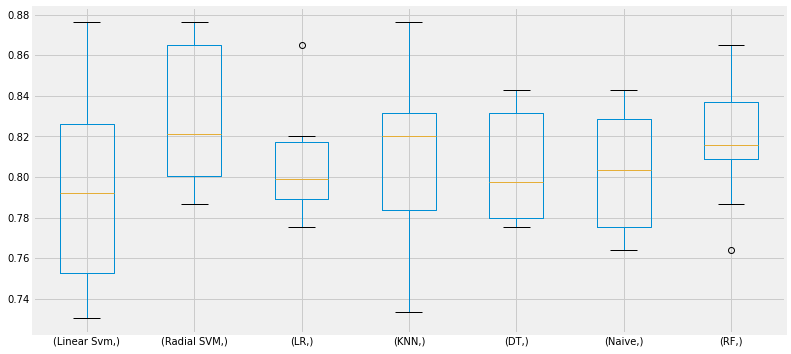

In [115]:
plt.subplots(figsize = (12,6))

box = pd.DataFrame(accuracy, index = [classifiers])

box.T.boxplot()

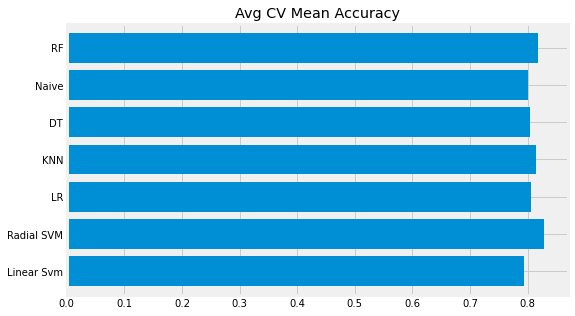

In [118]:
new_models_df2["CV Mean"].plot.barh(width = 0.8)

plt.title("Avg CV Mean Accuracy")

fig = plt.gcf()

fig.set_size_inches(8,5)

plt.show()

- 불균형으로 인해 분류 정확도가 잘못 될 수 있습니다. 모델이 어디에서 잘못되었는지 또는 모델이 잘못 예측 한 클래스를 보여주는 혼동 행렬의 도움으로 요약 된 결과를 얻을 수 있습니다.

# 하이퍼 매개 변수 조정
기계 학습 모델은 블랙 박스와 같습니다. 이 Black-Box에 대한 몇 가지 기본 매개 변수 값이 있으며 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있습니다. SVM 모델의 C 및 감마와 마찬가지로 서로 다른 분류기에 대한 유사하게 다른 매개 변수를 하이퍼 매개 변수라고하며, 알고리즘의 학습률을 변경하고 더 나은 모델을 얻기 위해 조정할 수 있습니다. 이를 Hyper-Parameter Tuning이라고합니다.

SVM 및 RandomForests와 같은 2 가지 최고의 분류기에 대한 하이퍼 매개 변수를 조정합니다.

In [119]:
from sklearn.model_selection import GridSearchCV

In [122]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']

In [123]:
hyper = {'kernel':kernel, 'C': C, 'gamma' : gamma}

gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)

In [124]:
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   17.6s finished


# Random Forest

In [125]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators': n_estimators}

gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   38.6s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


# 앙상블

Ensembling은 모델의 정확성이나 성능을 높이는 좋은 방법입니다. 간단히 말해서, 하나의 강력한 모델을 만들기 위해 다양한 단순 모델의 조합입니다.

우리가 전화를 사고 다양한 매개 변수를 기반으로 많은 사람들에게 물어보고 싶다고 가정 해 봅시다. 
따라서 우리는 모든 다른 매개 변수를 분석 한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 
이것은 모델의 안정성을 향상시키는 Ensembling입니다. Ensembling은 다음과 같은 방법으로 수행 할 수 있습니다.

1) Voting Classifier

2) Bagging

3) Boosting

# Voting Classifier

다양한 단순 기계 학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 제공합니다. 하위 모델 또는 기본 모델은 모두 diiferent 유형입니다.

In [126]:
from sklearn.ensemble import VotingClassifier

In [127]:
ensemble_lin_rbf = VotingClassifier(estimators = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ] , voting = 'soft').fit(train_X, train_Y)

In [128]:
print(ensemble_lin_rbf.score(test_X, test_Y))

0.8208955223880597


In [129]:
cross = cross_val_score(ensemble_lin_rbf, X,Y, cv = 10, scoring = "accuracy")

In [130]:
print('cross validated score is', cross.mean())

cross validated score is 0.8249188514357053


# Bagging
배깅은 일반적인 앙상블 방법입니다. 데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 구하는 방식으로 작동합니다. 평균화로 인해 분산이 감소합니다. 투표 분류기와 달리 Bagging은 유사한 분류기를 사용합니다.

Bagged KNN
Bagging은 분산이 높은 모델에서 가장 잘 작동합니다. 이에 대한 예는 의사 결정 트리 또는 임의 포리스트 일 수 있습니다. n_neighbours의 작은 값으로, n_neighbours의 작은 값으로 KNN을 사용할 수 있습니다.

In [135]:
from sklearn.ensemble import BaggingClassifier

model =  BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print('accuracy bagged KNN is', metrics.accuracy_score(prediction, test_Y))

result= cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')

print('cross valide for bagged KNN', result.mean())

accuracy bagged KNN is 0.835820895522388
cross valide for bagged KNN 0.8160424469413232
